# Pymaceuticals Inc.


### Analysis

* The distribution of male and female mice tested is similar, suggesting a balanced representation of genders.
* Tumor volumes decreased in mice treated with Capomulin and Ramicane.
* Significant differences in tumor volumes between Infubinol and Ceftamin required further statistical analysis.
* The tumor volume of a specific mouse on Capomulin treatment peaked at around 20th days.
* A strong positive correlation (Pearson Coefficient = 0.84) was found between the final tumor volume and weight of mice treated with Capomulin.

The analysis indicates that Capomulin and Ramicane effectively reduce tumor volumes. However, further statistical tests are needed to compare treatments accurately. Nevertheless, the correlation and regression analysis highlights a robust positive relationship between weight and tumor volume in mice treated with Capomulin. Additional studies and comments are required to validate these findings.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df  = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merge_data_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on="Mouse ID")
merge_data_df = pd.merge(mouse_metadata_df, study_results_df, how='left', on="Mouse ID")

# Display the data table for preview
merge_data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [110]:
# Checking the number of mice.
#total_mice = len(merge_data_df["Mouse ID"].unique())
total_mice = len(merge_data_df["Mouse ID"].value_counts())
print(f"Total number of mice: {total_mice}")

Total number of mice: 249


In [111]:
# Identify duplicates based on "Mouse ID" and "Timepoint" columns
duplicates = merge_data_df[merge_data_df.duplicated(["Mouse ID", "Timepoint"])]
# Get unique Mouse IDs from the duplicates
unique_duplicates = duplicates["Mouse ID"].unique()
unique_duplicates




array(['g989'], dtype=object)

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get all the data for the duplicate mouse ID
duplicate_mouse_id = 'g989'
duplicate_mouse_data = merge_data_df[merge_data_df['Mouse ID'] == duplicate_mouse_id]
duplicate_mouse_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [113]:
# Filter out rows where Mouse ID is "g989" drop duplicate mouse ID
clean_df = merge_data_df.loc[merge_data_df['Mouse ID'] != "g989"]
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [114]:
# Checking the number of mice in the clean DataFrame.
# nunber of unique mice in clean dataset
#new_total = len(clean_df["Mouse ID"].unique())
#new_total

total_mice = len(clean_df["Mouse ID"].unique())
print(f"Number of mice in the clean DataFrame: {total_mice}")



Number of mice in the clean DataFrame: 248


## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.or each regimen

# Calculate the mean tumor volume for each drug regimen
mean_tumor_vol = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

# Calculate the median tumor volume for each drug regimen
median_tumor_vol = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# Calculate the variance of tumor volume for each drug regimen
var_tumor_vol = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

# Calculate the standard deviation of tumor volume for each drug regimen
std_tumor_vol = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

# Calculate the standard error of the mean tumor volume for each drug regimen
sem_tumor_vol = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Create a dictionary to store the tumor volume summary statistics
tumor_dictionary = {
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": var_tumor_vol,
    "Tumor Volume Std. Dev.": std_tumor_vol,
    "Tumor Volume Std. Err.": sem_tumor_vol,
}

# Create a DataFrame to display the tumor volume summary statistics
tumor_vol_summary = pd.DataFrame(tumor_dictionary)
tumor_vol_summary.head(10)


/var/folders/4_/l1hhtdt16q1gg9gtpxmqk_bm0000gn/T/ipykernel_23609/1836668408.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_vol = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
/var/folders/4_/l1hhtdt16q1gg9gtpxmqk_bm0000gn/T/ipykernel_23609/1836668408.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_vol = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
/var/folders/4_/l1hhtdt16q1gg9gtpxmqk_bm0000gn/T/ipykernel_23609/1836668408.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future versio

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [116]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Perform aggregation on tumor volume statistics for each drug regimen
tumor_aggregation_summary = clean_df.groupby(["Drug Regimen"]).aggregate({
                        "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']
                        })

# Display the tumor volume aggregationsummary
tumor_aggregation_summary.head(10)



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

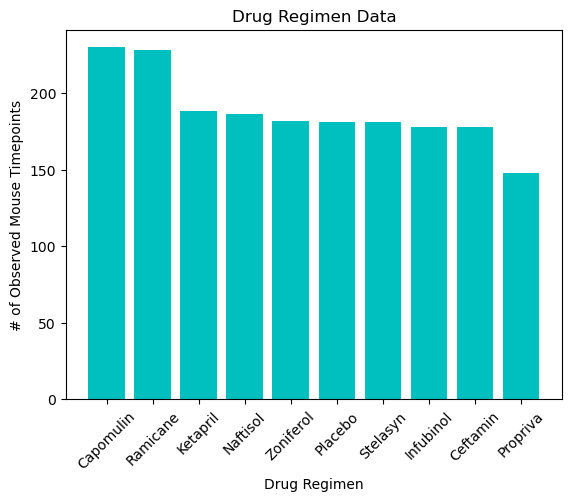

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of observations for each drug regimen
counts = clean_df["Drug Regimen"].value_counts()

# Plot the counts as a bar chart
plt.bar(counts.index, counts, color='c')

# Set the title and labels for the chart
plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=45) 

# Display bar chart
plt.show()


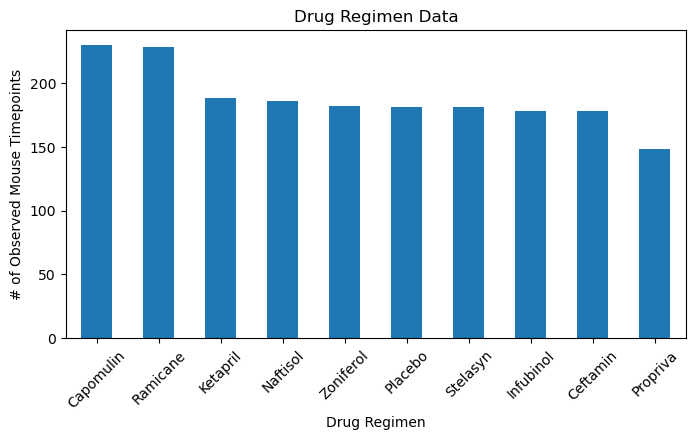

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count number of observations of each drug regimen
counts = clean_df["Drug Regimen"].value_counts()

# Create a bar plot
counts.plot(kind='bar', figsize=(8,4))

# Set the title, x-label, and y-label of the plot
plt.title("Drug Regimen Data")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


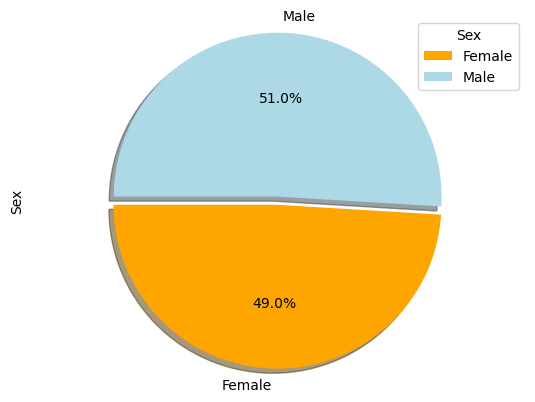

In [134]:
# Calculate total female and male mice
sex = clean_df["Sex"].value_counts()

# Set up the data for the pie chart
sex_counts = [sex['Female'], sex['Male']]
sex_labels = ['Female', 'Male']
sex_colors = ['orange', 'lightblue']
sex_explode = (0.05, 0)

# Plot the pie chart
plt.pie(sex_counts, labels=sex_labels, colors=sex_colors,
        autopct="%1.1f%%", shadow=True, startangle=180, explode=sex_explode)

# Set the aspect ratio 
plt.axis('equal')

# Set the title of the chart
plt.ylabel("Sex")

# Add legend
plt.legend(title="Sex", loc="best")

# Display pie chart
plt.show()


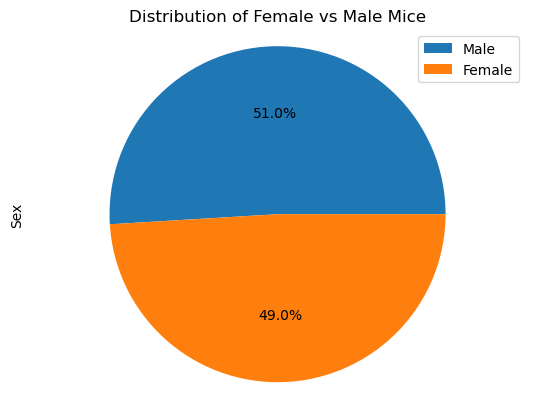

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate total female and male mice  
labels = clean_df["Sex"].value_counts().index
total = clean_df["Sex"].value_counts().values

# Generate a pie plot showing the distribution of female versus male mice
plt.pie(total, autopct="%1.1f%%")

# Add a legend
plt.legend(labels, loc="best")

# Set the title and ylabel
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

# Display the plot
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [136]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Create a new DataFrame with the final timepoints
final_timepoints_df = pd.DataFrame({"Timepoint": last_timepoints})

# Merge the final timepoints DataFrame with the original DataFrame to get the final tumor volume
final_tumor_df = pd.merge(final_timepoints_df, clean_df, on=["Mouse ID", "Timepoint"])

# Filter the DataFrame to include only the desired treatment regimens
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_df = final_tumor_df[final_tumor_df["Drug Regimen"].isin(treatment_regimens)]
final_tumor_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [137]:
# List the treatments 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to store tumor volume data 
tumor_volumes = []

# Loop through each treatment
for treatment in treatments:
    # Find the last (greatest) timepoint for each mouse on the treatment
    max_timepoint = clean_df.loc[clean_df["Drug Regimen"] == treatment]["Timepoint"].max()
    
    # Get the tumor volume of the last timepoint for each mouse on the treatment
    final_tumor_volumes = clean_df.loc[(clean_df["Drug Regimen"] == treatment) & (clean_df["Timepoint"] == max_timepoint)]["Tumor Volume (mm3)"]
    
    # Add final tumor volumes to the list for print
    tumor_volumes.append(final_tumor_volumes)
    
    # Calculate the interquartile range (IQR) for each treatment
    quartiles = final_tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine upper and lower bounds for outliers
    lower_bound = lowerq - (1.5*iqr)  
    upper_bound = upperq + (1.5*iqr)  
    
    # Check for outliers
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")




Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


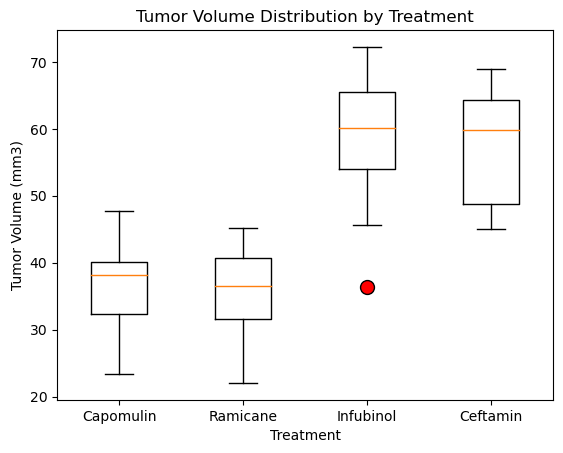

In [138]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create a list of the four treatment regimens of interest
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store the final tumor volumes for each mouse
tumor_volumes = []

# Loop through each treatment regimen
for treatment in treatments:
    # Subset the clean_df to only include data for the current treatment
    treatment_df = clean_df.loc[clean_df["Drug Regimen"] == treatment]
    
    # Group the data by Mouse ID to get the final timepoint for each mouse
    timepoint_df = treatment_df.groupby("Mouse ID").max()["Timepoint"]
    
    # Merge the timepoint_df with the treatment_df to get the final tumor volume for each mouse
    tumor_vol_df = pd.merge(timepoint_df, treatment_df, on=["Mouse ID", "Timepoint"])
    tumor_vol_list = tumor_vol_df["Tumor Volume (mm3)"]
    
    # Append the tumor volumes for the current treatment to the tumor_volumes list
    tumor_volumes.append(tumor_vol_list)
    
# Define the properties of the outlier markers
red_dot = dict(marker='o', markerfacecolor='red', markersize=10) 

# Generate a box plot of the tumor volumes for each treatment
plt.boxplot(tumor_volumes, labels=treatments, flierprops=red_dot)  
plt.title("Tumor Volume Distribution by Treatment")
plt.xlabel("Treatment")  
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

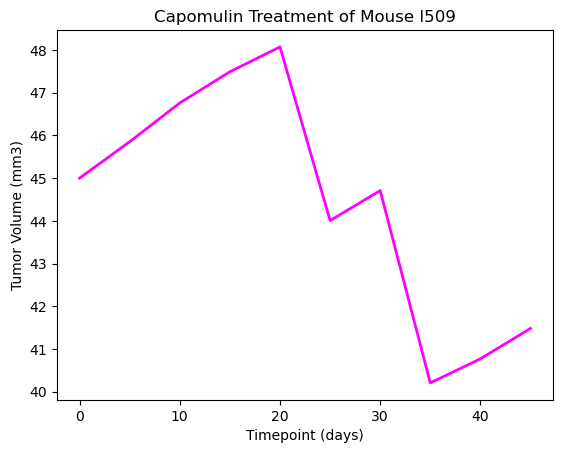

In [139]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Find data for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]

# Create X and Y axis lists
timepoints = mouse_data["Timepoint"]
tumor_volumes = mouse_data["Tumor Volume (mm3)"]

# Generate line plot
plt.plot(timepoints, tumor_volumes, color="magenta", linewidth=2) 
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()



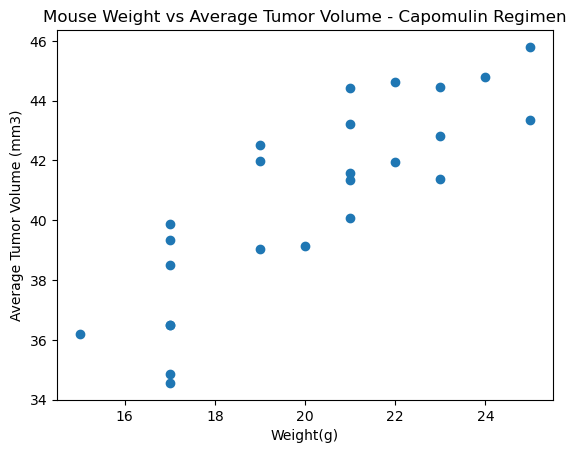

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to include Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] =='Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate the weight of mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot 
plt.scatter(mouse_weight, avg_tumor_volume)
plt.title('Mouse Weight vs Average Tumor Volume - Capomulin Regimen')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight & average tumor volume is 0.84


/var/folders/4_/l1hhtdt16q1gg9gtpxmqk_bm0000gn/T/ipykernel_23609/3762934557.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_grouped = capomulin_df.groupby('Mouse ID').mean()


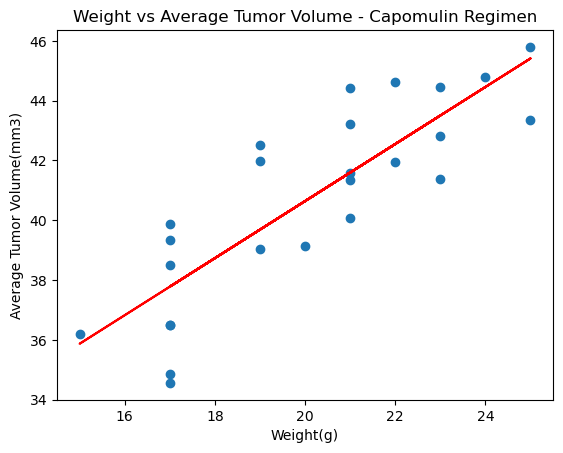

In [141]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Get the data for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
capomulin_grouped = capomulin_df.groupby('Mouse ID').mean()
capomulin_avg_vol = capomulin_grouped['Tumor Volume (mm3)']

# Get the mouse weight data
capomulin_weights = capomulin_grouped['Weight (g)']

# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_weights, capomulin_avg_vol)[0]
print(f"The correlation between mouse weight & average tumor volume is {correlation:.2f}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weights, capomulin_avg_vol)
regress_values = (capomulin_weights * slope + intercept)
line_eq = (f"y = {slope:.2f} x + {intercept:.2f}")

# Create the scatter plot and plot the regression line
plt.scatter(capomulin_weights, capomulin_avg_vol)
plt.plot(capomulin_weights, regress_values, "r-")

# Add labels and a title 
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Weight vs Average Tumor Volume - Capomulin Regimen")

# Show the plot
plt.show()
